In [1]:
import numpy as np
import pandas as pd

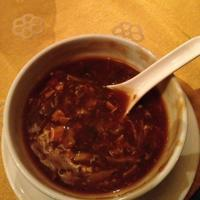

In [2]:
from IPython.display import Image
Image(filename='../data/train/B/TRAIN.1_BIODEG_ORI_4.jpg') 

## Train and Test!

In [3]:
import pathlib
import tensorflow as tf 

data_dir = pathlib.Path('/home/anyelle/code/anyellequeiroz/get-it-right/data/test')

2023-03-10 12:05:35.517985: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 12:05:35.689206: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-10 12:05:35.698050: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-10 12:05:35.698065: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [4]:
batch_size = 16
img_height = 200
img_width = 200

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16726 files belonging to 2 classes.
Using 13381 files for training.


2023-03-10 12:05:40.188900: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-10 12:05:40.188951: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-10 12:05:40.188998: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-3726K3E2): /proc/driver/nvidia/version does not exist
2023-03-10 12:05:40.189570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16726 files belonging to 2 classes.
Using 3345 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['B', 'N']


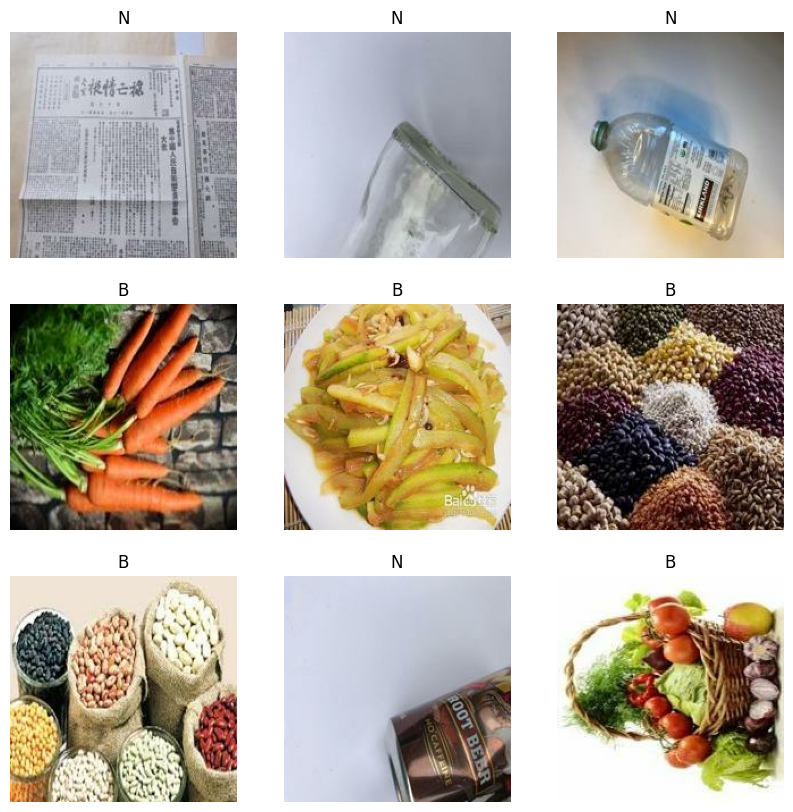

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 200, 200, 3)
(16,)


## Model

In [11]:
num_classes

2

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [14]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
419/419 [==============================] - 87s 203ms/step - loss: 0.3656 - accuracy: 0.8418 - val_loss: 0.3030 - val_accuracy: 0.8652
Epoch 2/10
419/419 [==============================] - 81s 194ms/step - loss: 0.2604 - accuracy: 0.8934 - val_loss: 0.2733 - val_accuracy: 0.8858
Epoch 3/10
419/419 [==============================] - 86s 204ms/step - loss: 0.2220 - accuracy: 0.9108 - val_loss: 0.2504 - val_accuracy: 0.9019
Epoch 4/10
419/419 [==============================] - 83s 197ms/step - loss: 0.1607 - accuracy: 0.9369 - val_loss: 0.2782 - val_accuracy: 0.8990
Epoch 5/10
419/419 [==============================] - 84s 199ms/step - loss: 0.1162 - accuracy: 0.9587 - val_loss: 0.3017 - val_accuracy: 0.8981
Epoch 6/10
419/419 [==============================] - 86s 204ms/step - loss: 0.0729 - accuracy: 0.9730 - val_loss: 0.4270 - val_accuracy: 0.8909
Epoch 7/10
419/419 [==============================] - 84s 199ms/step - loss: 0.0577 - accuracy: 0.9787 - val_loss: 0.4056 - val_ac

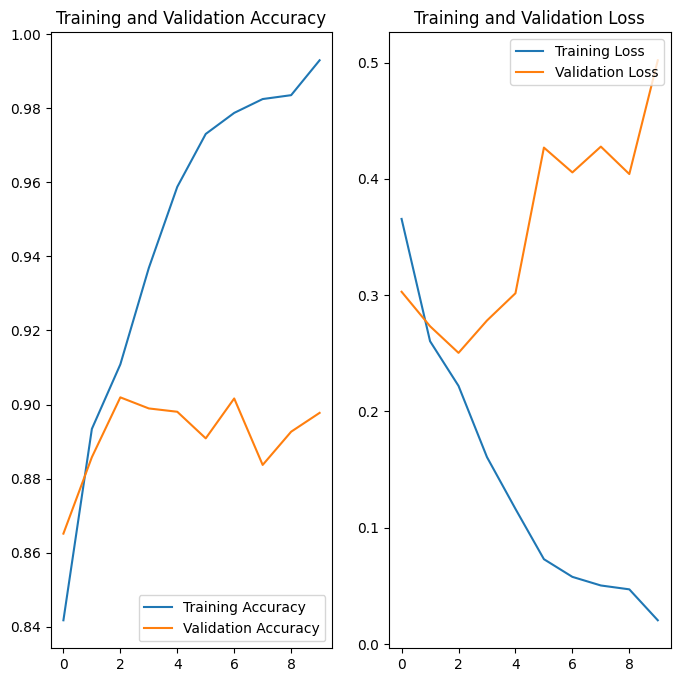

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
predictions = model.predict(val_ds)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

105/105 [==============================] - 8s 80ms/step
This image most likely belongs to B with a 99.99 percent confidence.


In [31]:
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#instantiate the ImageDataGenerator class
datagen = ImageDataGenerator(
        rotation_range=40,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

#loop over the data in batches and this automatically saves the images
i = 0
for batch in datagen.flow_from_directory('/home/anyelle/code/anyellequeiroz/get-it-right/data/test', batch_size=6,target_size=(256,256),
                          save_to_dir='/home/anyelle/code/anyellequeiroz/get-it-right/data/test/aug', save_format='jpg'):
    i += 1
    if i > 50:
        break

Found 17068 images belonging to 3 classes.


In [39]:
import time
timestamp = time.strftime("%Y%m%d-%H%M%S")

# save model locally
model.save('get-it-right/my_model.h5')
print("✅ Model saved locally")


✅ Model saved locally


In [40]:
new_model = tf.keras.models.load_model('get-it-right/my_model.h5')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1